## Import Necessary Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, CategoricalNB

import warnings
warnings.filterwarnings('ignore')

## Import Dataset 

In [66]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
test_data = pd.read_csv('SalaryData_Test(1).csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA 

In [68]:
#Summary of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [69]:
#Summary of train dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [70]:
#Statistical Summary
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [71]:
#Statistical Summary
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [72]:
#Checking the duplicate values
train_data[train_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [73]:
#Dropping the duplicates
train_data.drop_duplicates(inplace=True)

In [74]:
train_data.shape

(26903, 14)

In [75]:
#Checking the duplicate values
test_data[test_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [76]:
#Dropping the duplicates
test_data.drop_duplicates(inplace=True)

In [77]:
test_data.shape

(14130, 14)

In [78]:
#Visualizing the target variable
train_data.Salary.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [79]:
#Visualizing the target variable
test_data.Salary.value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

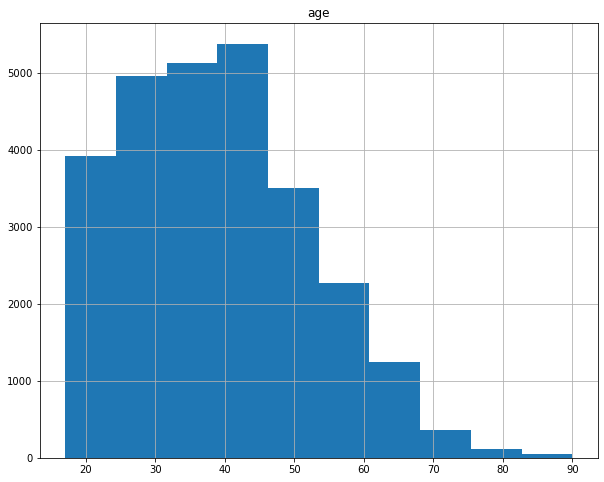

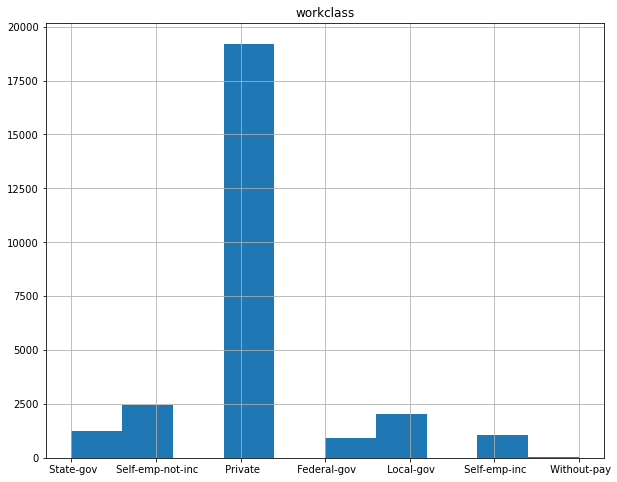

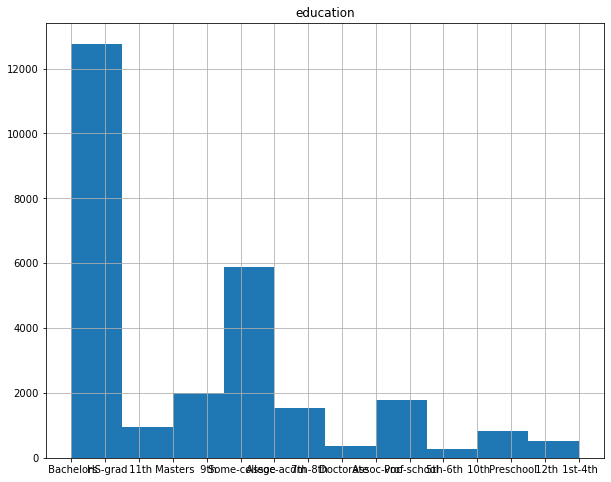

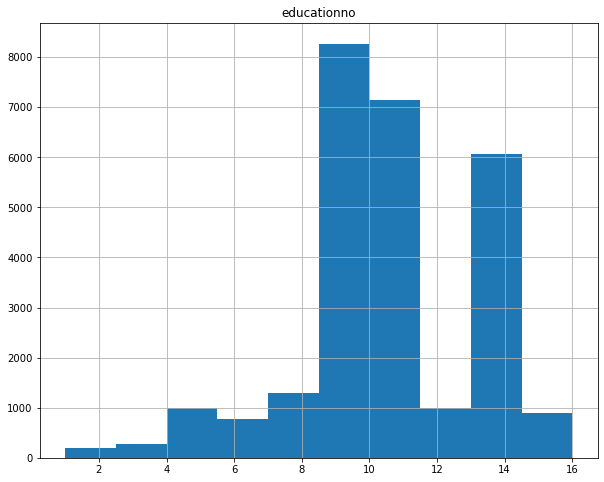

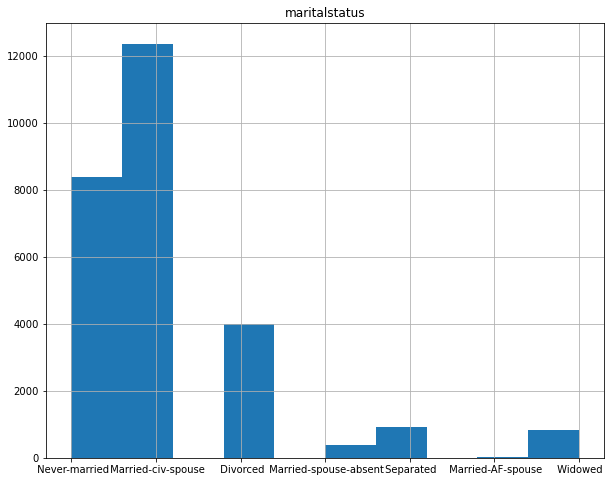

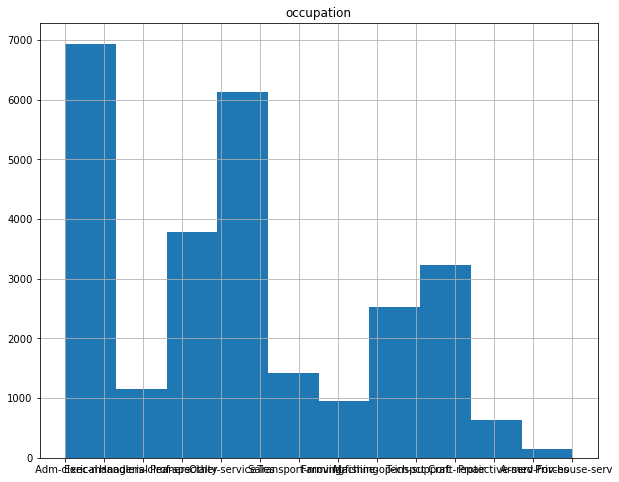

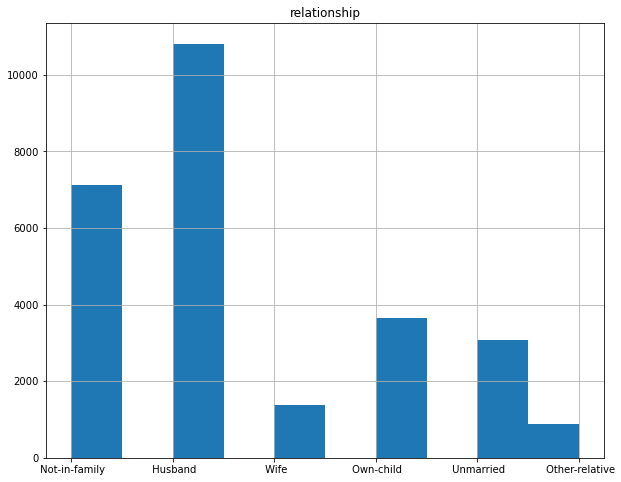

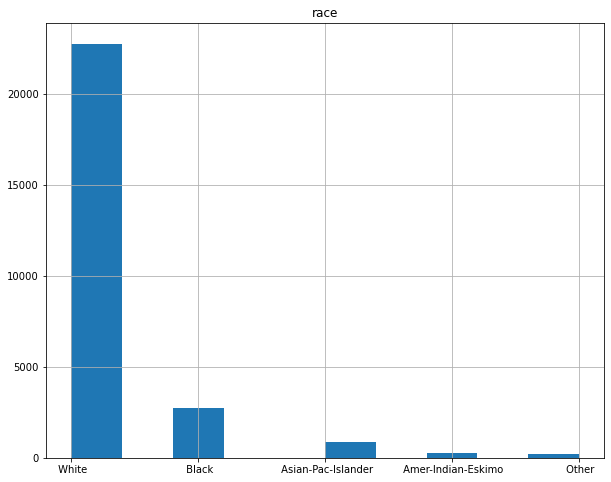

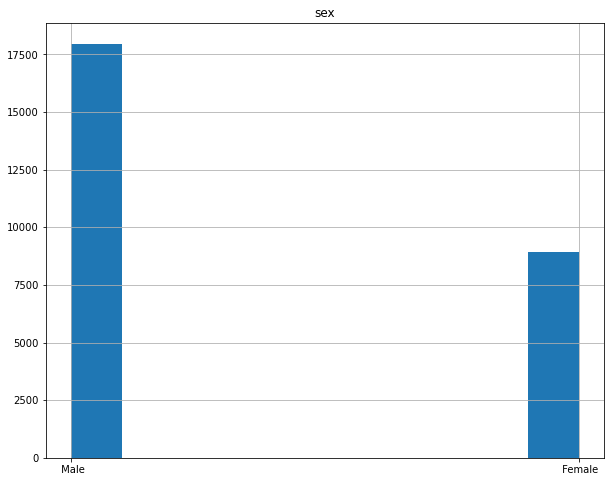

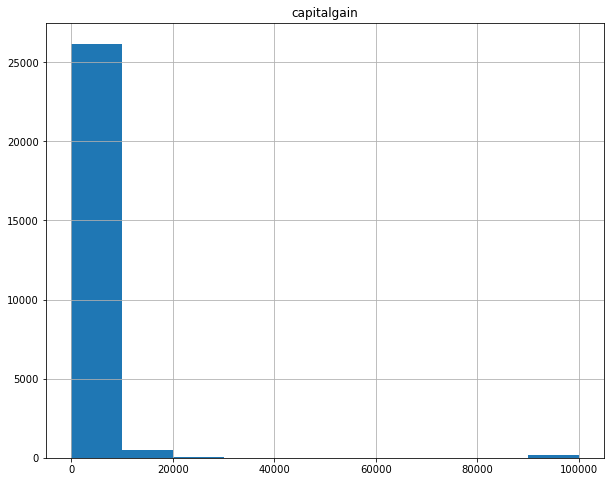

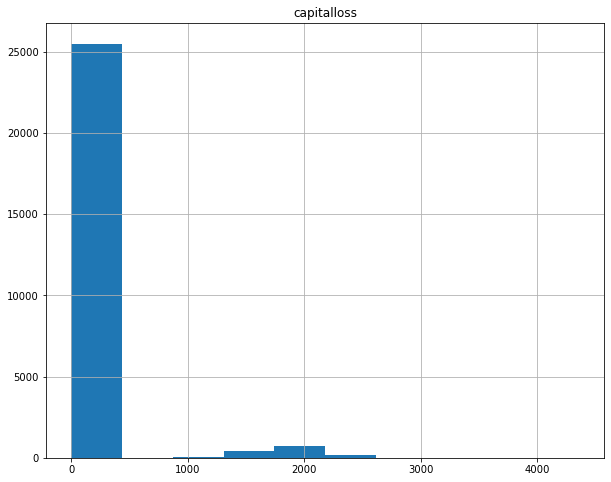

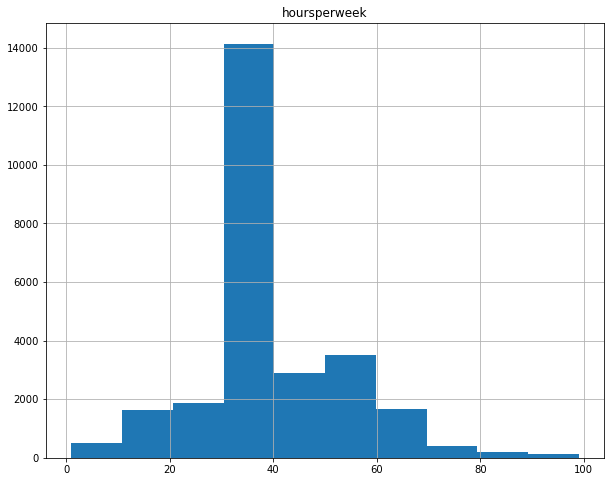

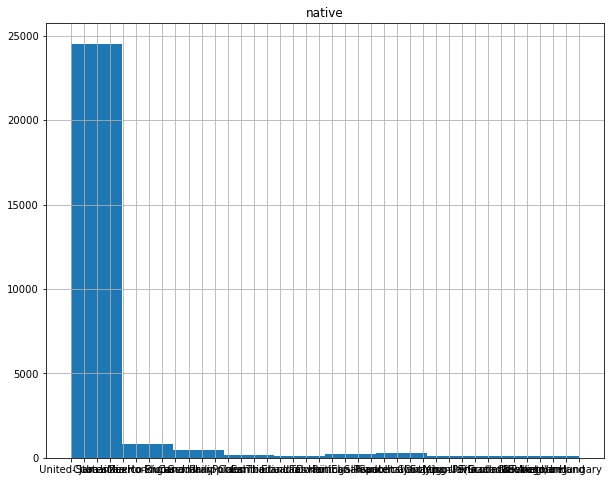

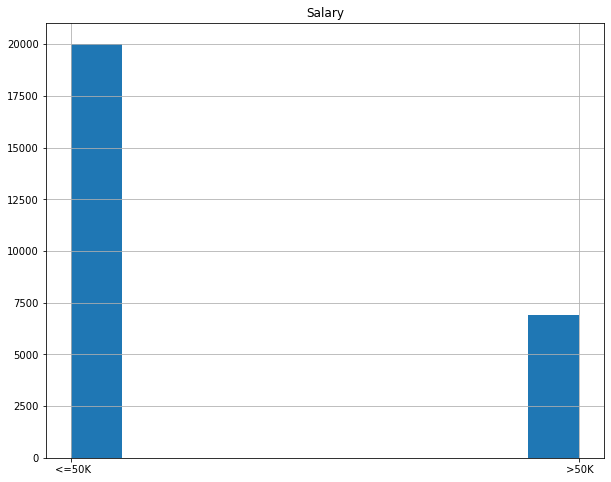

In [80]:
#Checking the distribution
col = train_data.columns

for i in col:
    plt.figure(figsize=(10,8))
    plt.hist(train_data[i])
    plt.grid()
    plt.title(i)
    plt.show()

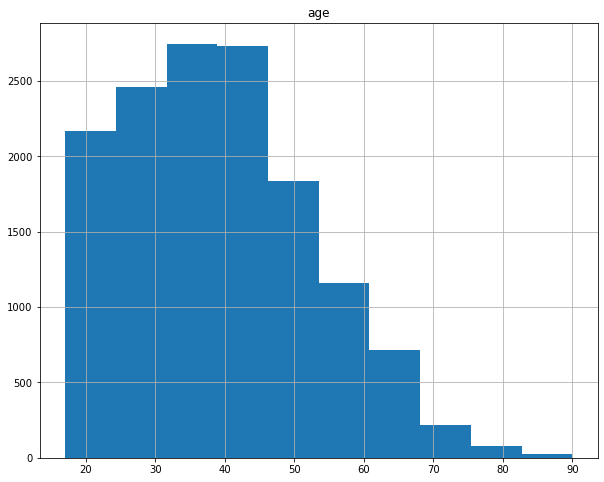

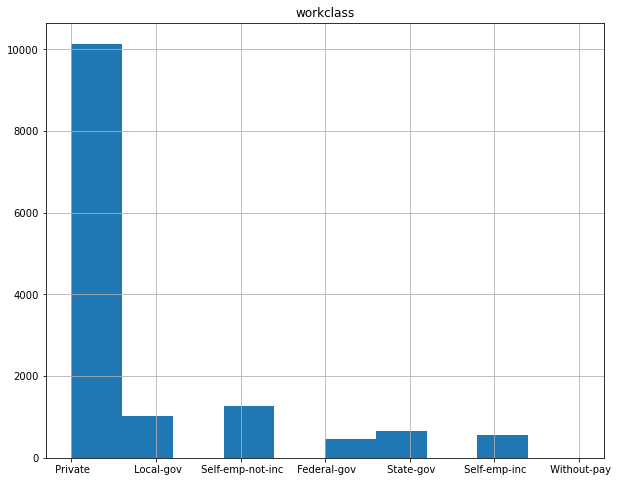

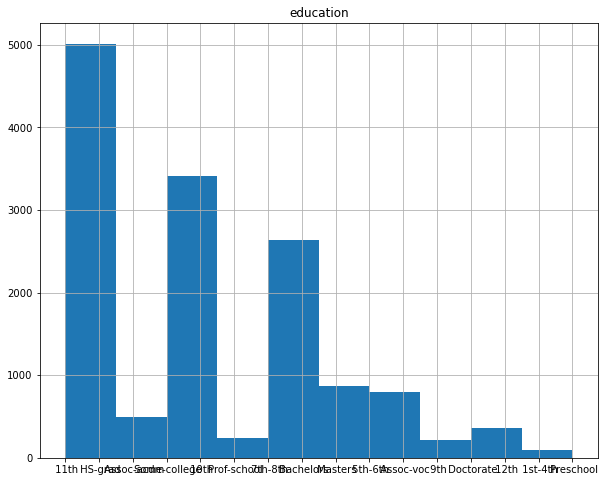

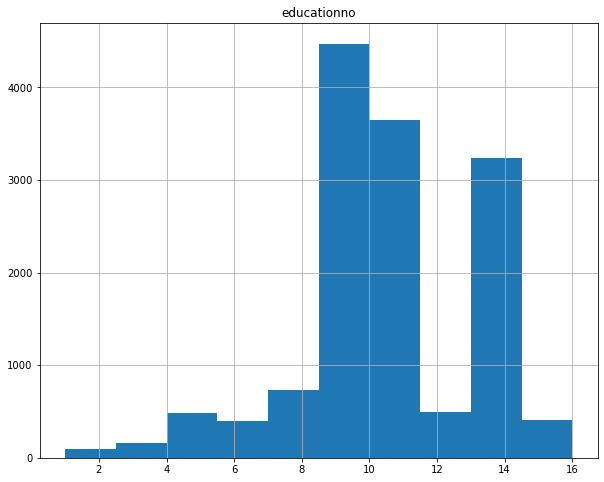

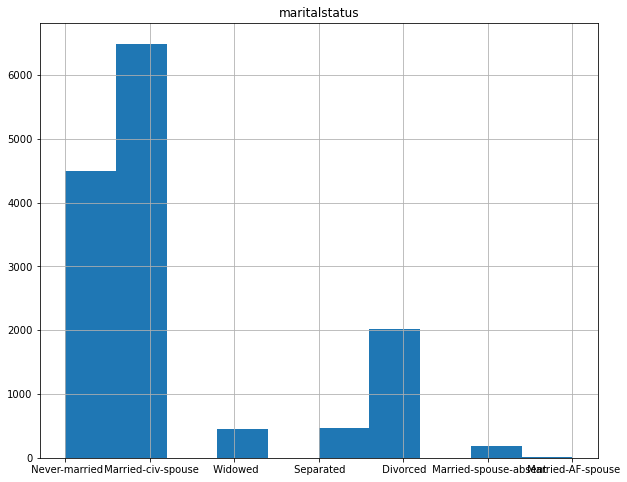

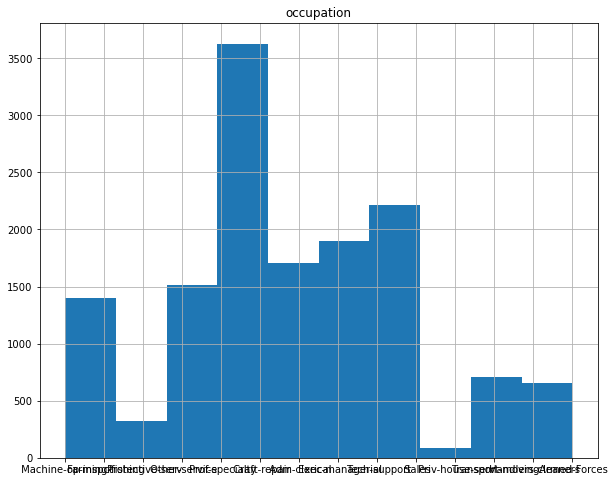

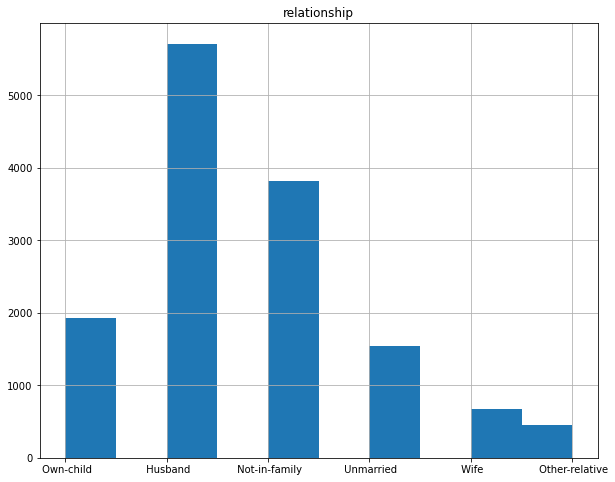

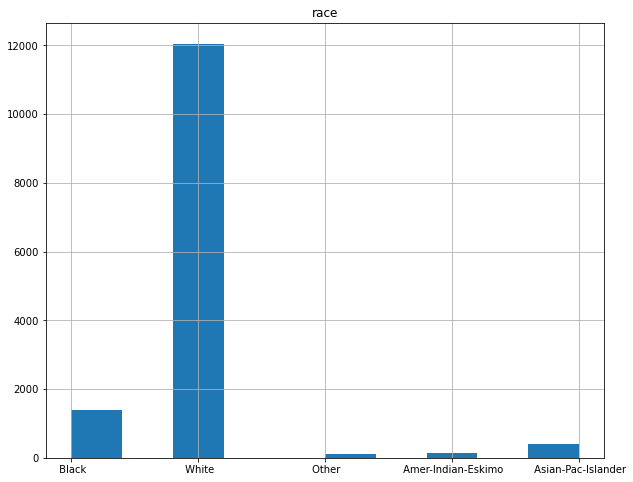

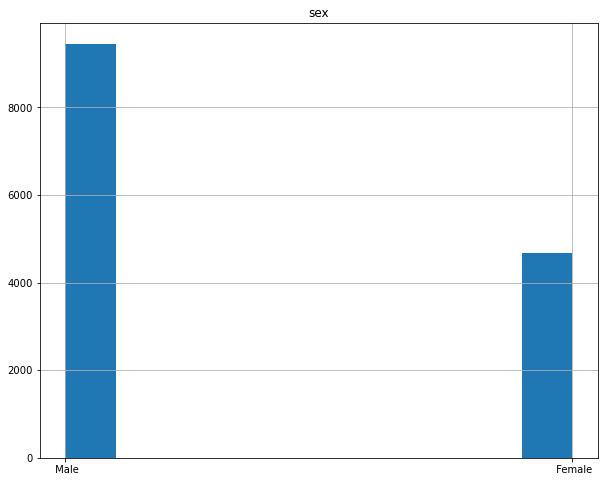

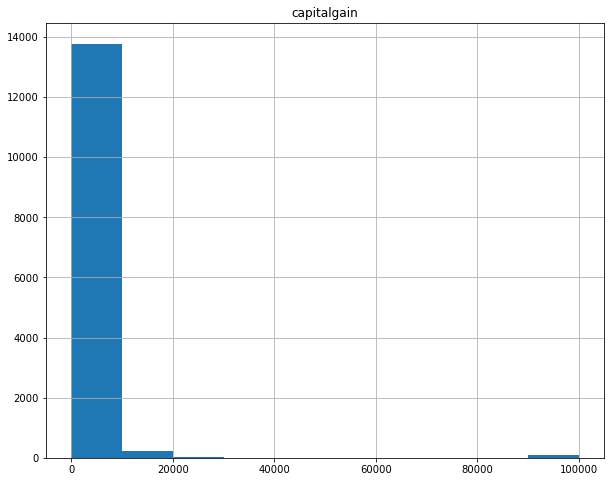

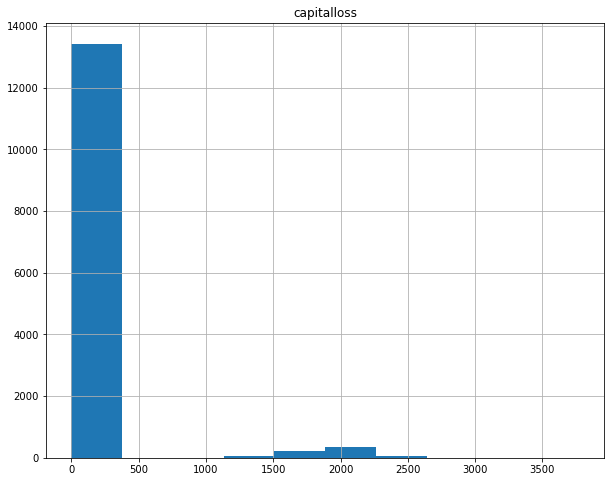

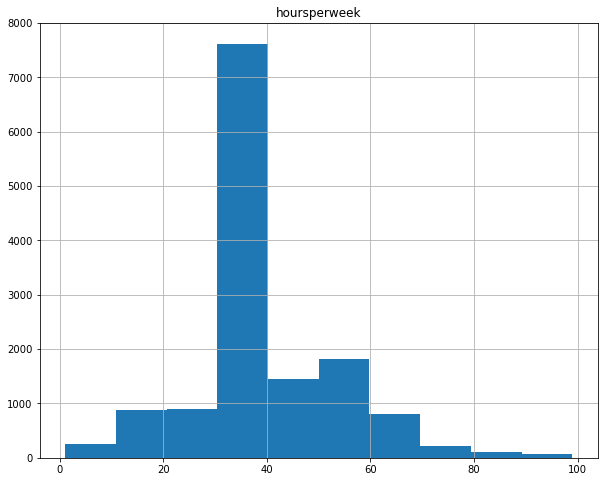

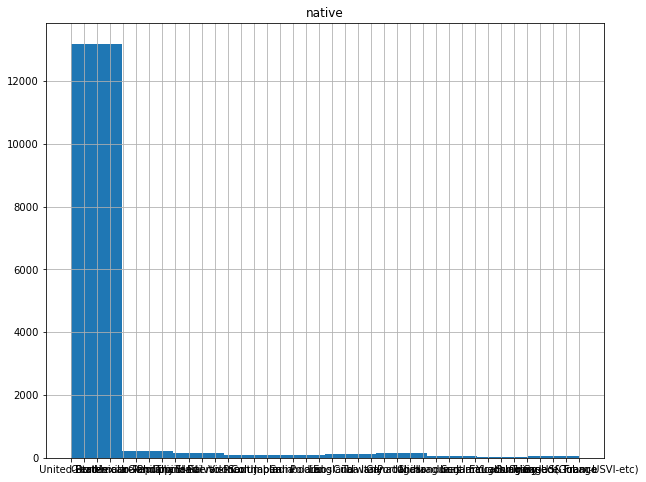

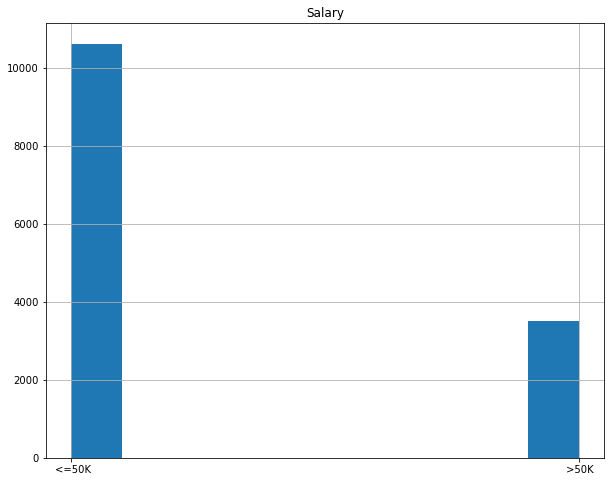

In [81]:
col = test_data.columns

for i in col:
    plt.figure(figsize=(10,8))
    plt.hist(test_data[i])
    plt.grid()
    plt.title(i)
    plt.show()

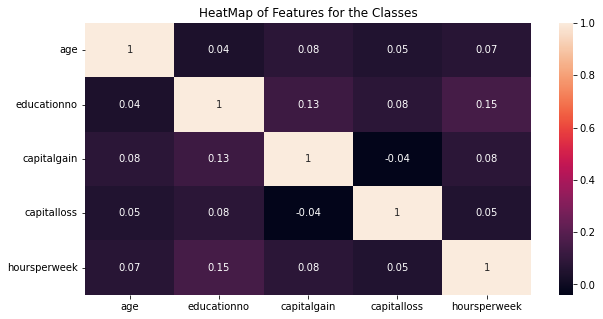

In [82]:
#Plotting heatmap for features - train data
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr().round(2), annot=True)
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

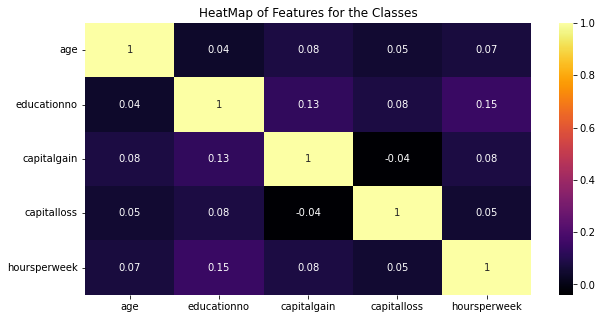

In [83]:
#Plotting heatmap for features - test data
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr().round(2), annot=True, cmap='inferno')
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

## Encoding the variables

In [84]:
#categorical columns
col_names = ['workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex', 'native','Salary']

In [85]:
le = LabelEncoder()
for i in col_names:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i]  = le.fit_transform(test_data[i])

## Feature Scaling 

In [86]:
test_data.shape

(14130, 14)

In [87]:
sc_train = MinMaxScaler()
sc_test  = MinMaxScaler()

In [88]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, 13:]

In [89]:
X_train.shape, y_train.shape

((26903, 13), (26903, 1))

In [90]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, 13:]

In [91]:
X_test.shape, y_test.shape

((14130, 13), (14130, 1))

In [92]:
X_train = sc_train.fit_transform(X_train)

In [93]:
X_test = sc_test.fit_transform(X_test)

In [94]:
X_train.shape, X_test.shape

((26903, 13), (14130, 13))

In [95]:
y_train.shape, y_test.shape

((26903, 1), (14130, 1))

## Model Building 

In [96]:
model = GaussianNB()

In [97]:
model.fit(X_train, y_train)

GaussianNB()

## Model Training & Evaluation 

In [98]:
y_pred_train = model.predict(X_train)

In [99]:
accuracy_score(y_train, y_pred_train).round(3)

0.796

In [100]:
confusion_matrix(y_train, y_pred_train)

array([[18937,  1086],
       [ 4414,  2466]], dtype=int64)

In [101]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     20023
           1       0.69      0.36      0.47      6880

    accuracy                           0.80     26903
   macro avg       0.75      0.65      0.67     26903
weighted avg       0.78      0.80      0.77     26903



## Model Testing & Evaluation 

In [102]:
y_pred_test = model.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred_test).round(3)

0.796

In [104]:
confusion_matrix(y_test, y_pred_test)

array([[10030,   590],
       [ 2296,  1214]], dtype=int64)

In [105]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     10620
           1       0.67      0.35      0.46      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.65      0.67     14130
weighted avg       0.78      0.80      0.77     14130



### From above model, we can conclude that model performance is good and also the train and test data are similar. Hence, we can say that model is not over-fitted to our dataset. Let's try out with K-Fold for our dataset accuracy.

## K-Fold - Model Building & Testing

In [106]:
X_train = pd.DataFrame(X_train, columns=(train_data.columns[:-1]))
X_test  = pd.DataFrame(X_test, columns=(test_data.columns[:-1]))

In [107]:
y_train = pd.DataFrame(y_train, columns=(train_data.columns[13:]))
y_test  = pd.DataFrame(y_test, columns=(test_data.columns[13:]))

In [108]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [109]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [111]:
scores = cross_val_score(estimator=model, X=X, y=y, cv=kf)
scores

array([0.80019493, 0.80092593, 0.78849903, 0.78649768, 0.80087741,
       0.80502072, 0.79380941, 0.78674141, 0.79380941, 0.79917134])

In [113]:
scores.mean().round(3)

0.796

In [114]:
scores.min().round(3)

0.786

In [115]:
scores.max().round(3)

0.805

In [116]:
scores.std().round(3)

0.006

### Conclusion:
**We can finalise our model as K-Fold score is good and also deviation of our model is very low.**

### ================================================================= 